Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 여러가지 가상 데이터를 생성하는 함수를 제공한다.

### make_classification
make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.

+ 인수:
    + n_samples : 표본 데이터의 수, 디폴트 100
    + n_features : 독립 변수의 수, 디폴트 20
    + n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
    + n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
    + n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
    + n_classes : 종속 변수의 클래스 수, 디폴트 2
    + n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
    + weights : 각 클래스에 할당된 표본 수
    + random_state : 난수 발생 시드

+ 반환값:
    + X : [n_samples, n_features] 크기의 배열
        + 독립 변수
    + y : [n_samples] 크기의 배열
        + 종속 변수

다음 코드는 1개의 독립변수를 가지고 2개의 클래스를 가지는 데이터를 생성한 예이다.

In [2]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 13

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

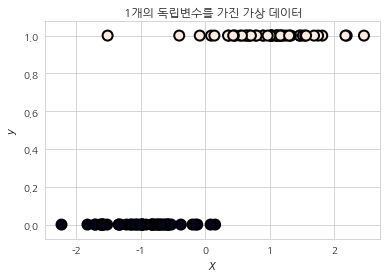

In [3]:
from sklearn.datasets import make_classification

plt.title("1개의 독립변수를 가진 가상 데이터")
X, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.scatter(X, y, marker='o', c=y, s=100, edgecolors='k', linewidths=2)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

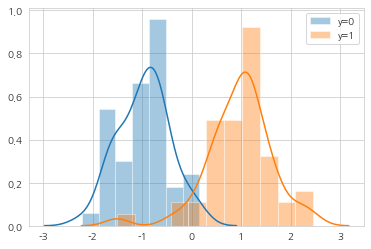

In [4]:
sns.distplot(X[y==0], label="y=0")
sns.distplot(X[y==1], label="y=1")
plt.legend()
plt.show()

이번에는 2개의 독립변수를 가지고 2개의 클래스를 가지는 데이터를 생성한다. 이 때, n_informative 변수를 1로 설정했다. 즉 2개의 독립변수 중 실제로 타겟 클래스와 상관관계가 있는 것은 1개의 독립변수이다.

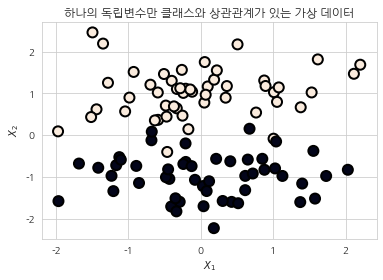

In [6]:
plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, marker='o', edgecolors='k', linewidths=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

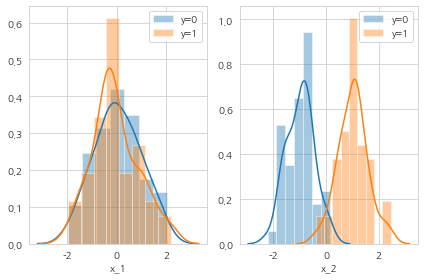

In [7]:
plt.subplot(121)
sns.distplot(X[y==0, 0], label="y=0")
sns.distplot(X[y==1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y==0, 1], label="y=0")
sns.distplot(X[y==1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.tight_layout()
plt.show()

n_informative 변수를 2로 설정했을 때는 다음과 같이 두 변수 모두 클래스와 상관관계가 있는 가상 데이터가 생성된다.

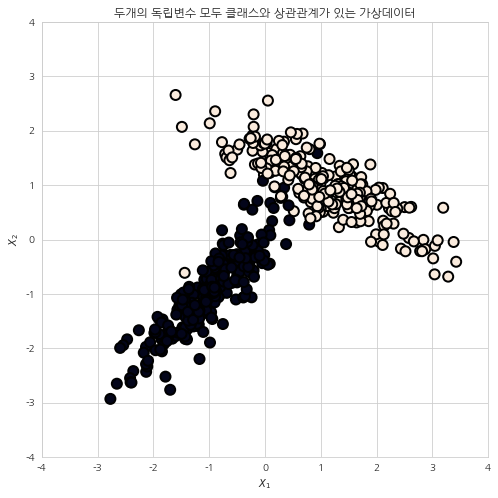

In [8]:
plt.figure(figsize=(8, 8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, marker='o', edgecolor='k', linewidth=2)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

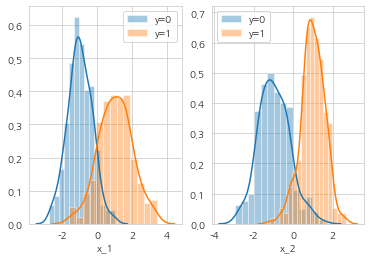

In [9]:
plt.subplot(121)
sns.distplot(X[y==0, 0], label="y=0")
sns.distplot(X[y==1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y==0, 1], label="y=0")
sns.distplot(X[y==1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

In [12]:
# 고유값, 고유벡터 구하기
l, V = np.linalg.eig(X.T @ X)
print("고유값 =\n", l)
print("고유벡터 =\n", V)

고유값 =
 [1314.01933999  275.76601612]
고유벡터 =
 [[ 0.75679278 -0.65365487]
 [ 0.65365487  0.75679278]]


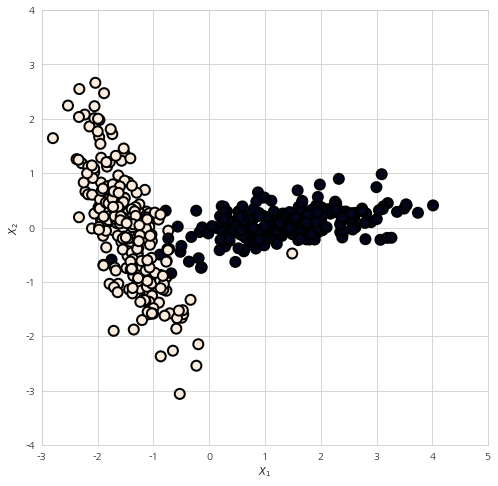

In [15]:
X2 = -X @ V

plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y, s=100, edgecolors='k', linewidths=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.xlim(-3, 5)
plt.ylim(-4, 4)
plt.show()

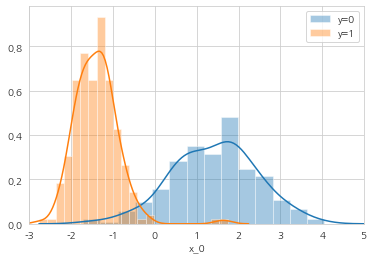

In [17]:
# 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

sns.distplot(X_pca[y==0, 0], label="y=0")
sns.distplot(X_pca[y==1, 0], label="y=1")
plt.legend()
plt.xlabel("x_0")
plt.xlim(-3, 5)
plt.show()

In [20]:
X_pca.shape

(500, 1)

클래스 별 데이터의 갯수에 차이를 주고 싶을 땐, weights인수를 설정하면 된다. 이는 추후 배울 비대칭데이터를 시뮬레이션 할 때 사용할 것이다. 다음 코드에서는 weight인수를 각 각 0.9, 0.1로 설정 했다.

각 클래스별 데이터의 갯수 - 0 클래스 : 90, 1 클래스 : 10


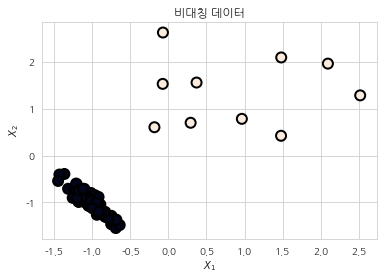

In [25]:
plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)  # val (0, 1), cnt (90, 10)

print("각 클래스별 데이터의 갯수 - {} 클래스 : {}, {} 클래스 : {}".format(val[0], cnt[0], val[1], cnt[1]))

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, marker='o', edgecolors='k', linewidths=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

n_clusters_per_class 인수를 2로 설정하여, 클래스 당 클러스터 갯수를 늘리면 다음 코드의 결과와 같이 클래스끼리 잘 분리되어 있지 않은 가상데이터를 얻을 수 있다. 

클래스 당 클러스터 갯수를 설정할 때 주의 할 점은  n_classes×n_clusters_per_class  는 2^n_informative 보다 작거나 같도록 설정해야 한다는 것이다.

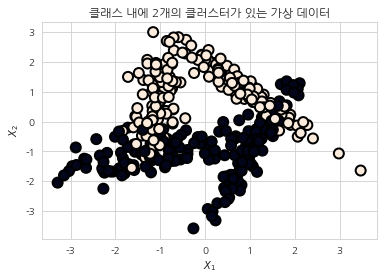

In [26]:
plt.title("클래스 내에 2개의 클러스터가 있는 가상 데이터")
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=0)

plt.scatter(X2[:, 0], X2[:, 1], marker='o', s=100, c=Y2, edgecolors='k', linewidths=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

다음은 다중 클래스를 가지는 가상데이터를 생성한 예이다.

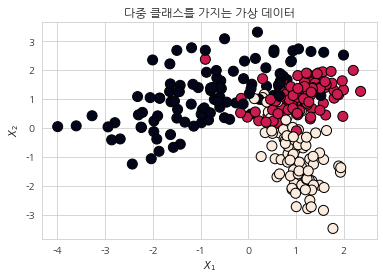

In [28]:
plt.title("다중 클래스를 가지는 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, edgecolors='k', linewidths=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## make_blobs

#### make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.  이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 

다음 데이터 생성 코드의 결과를 보면 make_classification 함수로 만든 가상데이터와 모양이 다른 것을 확인 할 수 있다. make_blobs는 보통 클러스링용 가상데이터를 생성하는데 사용한다. make_blobs 함수의 인수와 반환값은 다음과 같다.

+ 인수:
    + n_samples : 표본 데이터의 수, 디폴트 100
    + n_features : 독립 변수의 수, 디폴트 20
    + centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
    + cluster_std: 클러스터의 표준 편차, 디폴트 1.0
    + center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))
+ 반환값:
    + X : [n_samples, n_features] 크기의 배열
        + 독립 변수
    + y : [n_samples] 크기의 배열
        + 종속 변수

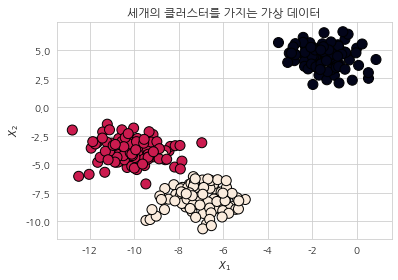

In [29]:
from sklearn.datasets import make_blobs

plt.title("세개의 클러스터를 가지는 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, linewidths=1, edgecolors='k')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## make_moons

make_moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. make_moons 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

+ 인수:
    + n_samples : 표본 데이터의 수, 디폴트 100
    + noise: 잡음의 크기. 0이면 정확한 반원을 이룸

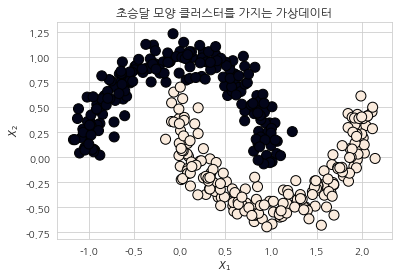

In [32]:
from sklearn.datasets import make_moons

plt.title("초승달 모양 클러스터를 가지는 가상데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolors='k', linewidths=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## make_gaussian_quantiles

#### make_gaussian_quantiles 함수는 다차원 가우시안 분포의 표본을 생성하고 분포의 기대값을 중심으로 한 등고선으로 클래스를 분리한다. 

함수의 인수와 반환값은 다음과 같다. 이 데이터는 타원형 형태의 닫힌 경계선으로만 분류할 수 있다.

+ 인수:
    + mean: 기댓값 벡터
    + cov: 공분산 행렬
    + n_samples : 표본 데이터의 수, 디폴트 100
    + n_features : 독립 변수의 수, 디폴트 20
    + n_classes : 클래스의 수
+ 반환값:
    + X : [n_samples, n_features] 크기의 배열
        + 독립 변수
    + y : [n_samples] 크기의 배열
        + 종속 변수

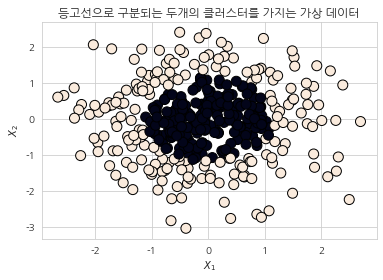

In [33]:
from sklearn.datasets import make_gaussian_quantiles

plt.title("등고선으로 구분되는 두개의 클러스터를 가지는 가상 데이터")
X, y = make_gaussian_quantiles(n_samples=400, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, marker='o', edgecolors='k', linewidths=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()